In [29]:
import sklearn
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingClassifier
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn import preprocessing
from imblearn.over_sampling import SMOTE
from sklearn.metrics import brier_score_loss
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, f1_score, roc_curve



df = pd.read_csv("pacientesSOFAsemnull.csv")

In [30]:
y = df['sepsis']
X = df[['cardiovascular','coagulation','cns','respiration','liver','renal','age']]

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3)


In [32]:
df.corr()

,subject_id,age,sofa,cardiovascular,coagulation,cns,respiration,liver,renal,sepsis,sepsis_martins,septic_shock,severe_sepsis,avc,infarto
subject_id,1.000000,-0.038029,0.050233,0.048009,-0.043373,0.015439,0.022057,0.020847,-0.040219,-0.071249,-0.069275,-0.002939,-0.037076,0.071362,NaN
age,-0.038029,1.000000,0.105784,0.060581,-0.031471,0.099316,-0.003615,-0.049903,0.005713,0.069019,0.069090,0.019407,0.008117,0.166496,NaN
sofa,0.050233,0.105784,1.000000,0.581796,0.085013,0.101735,0.070872,0.072769,0.076439,0.080781,0.090907,0.036880,0.035577,-0.019268,NaN
cardiovascular,0.048009,0.060581,0.581796,1.000000,-0.289621,-0.346591,-0.241446,-0.247910,-0.260414,0.076187,0.082186,0.073403,0.059639,-0.025133,NaN
coagulation,-0.043373,-0.031471,0.085013,-0.289621,1.000000,-0.050644,-0.035280,-0.036225,-0.038052,-0.009559,-0.008759,-0.000602,0.023161,-0.059972,NaN
cns,0.015439,0.099316,0.101735,-0.346591,-0.050644,1.000000,-0.042220,-0.043350,-0.045537,0.012454,0.013500,-0.048656,-0.056254,-0.002369,NaN
respiration,0.022057,-0.003615,0.070872,-0.241446,-0.035280,-0.042220,1.000000,-0.030199,-0.031722,0.020823,0.021596,0.013558,0.002375,0.056108,NaN
liver,0.020847,-0.049903,0.072769,-0.247910,-0.036225,-0.043350,-0.030199,1.000000,-0.032572,-0.031001,-0.030400,-0.034803,-0.040238,-0.017114,NaN
renal,-0.040219,0.005713,0.076439,-0.260414,-0.038052,-0.045537,-0.031722,-0.032572,1.000000,-0.037091,-0.036476,-0.036558,-0.003551,0.061649,NaN
sepsis,-0.071249,0.069019,0.080781,0.076187,-0.009559,0.012454,0.020823,-0.031001,-0.037091,1.000000,0.994549,0.443946,0.513273,-0.038088,NaN


In [33]:
#boosting

In [34]:
oversample = SMOTE()
over_X, over_y = oversample.fit_resample(X, y)
over_X_train, over_X_test, over_y_train, over_y_test = train_test_split(over_X, over_y, test_size=0.3, stratify=over_y)

SMOTE_boost = GradientBoostingClassifier(n_estimators=250,learning_rate=0.3,random_state=1,max_depth=5)
SMOTE_boost.fit(over_X_train, over_y_train)
print(SMOTE_boost.score(over_X_train, over_y_train))
#SMOTE SRF prediction result
y_pred_boost = SMOTE_boost.predict(over_X_test)
y_pred_proba_boost = SMOTE_boost.predict_proba(over_X_test)[::,1]


0.7953667953667953


C:\Users\55119\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\55119\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


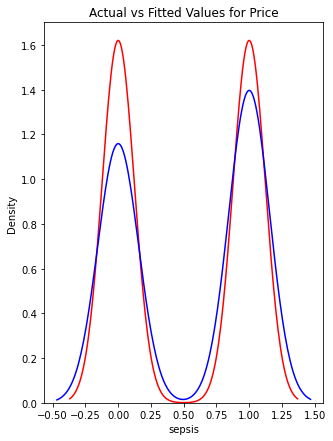

In [35]:
import seaborn as sns
plt.figure(figsize=(5, 7))


ax = sns.distplot(over_y, hist=False, color="r", label="Actual Value")
sns.distplot(y_pred_boost, hist=False, color="b", label="Fitted Values" , ax=ax)


plt.title('Actual vs Fitted Values for Price')


plt.show()
plt.close()

In [36]:
from sklearn.metrics import precision_recall_fscore_support
print(classification_report(over_y_test, y_pred_boost))


              precision    recall  f1-score   support

           0       0.72      0.65      0.68       167
           1       0.68      0.74      0.71       166

    accuracy                           0.69       333
   macro avg       0.70      0.69      0.69       333
weighted avg       0.70      0.69      0.69       333



In [37]:
confusion_matrix(over_y_test, y_pred_boost)

array([[108,  59],
       [ 43, 123]], dtype=int64)

In [38]:
#logistic regrression

In [39]:
SMOTE_logreg = LogisticRegression( random_state=1)
SMOTE_logreg.fit(over_X_train, over_y_train)
print(SMOTE_logreg.score(over_X_train, over_y_train))
#SMOTE SRF prediction result
y_pred_logreg = SMOTE_logreg.predict(over_X_test)
y_pred_proba_logreg = SMOTE_logreg.predict_proba(over_X_test)[::,1]

0.5765765765765766


C:\Users\55119\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\55119\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


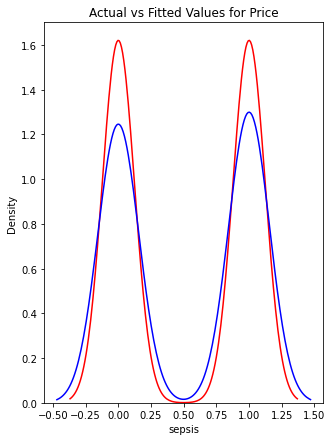

In [40]:
import seaborn as sns
plt.figure(figsize=(5, 7))


ax = sns.distplot(over_y, hist=False, color="r", label="Actual Value")
sns.distplot(y_pred_logreg, hist=False, color="b", label="Fitted Values" , ax=ax)


plt.title('Actual vs Fitted Values for Price')


plt.show()
plt.close()

In [41]:
from sklearn.metrics import precision_recall_fscore_support
print(classification_report(over_y_test, y_pred_logreg))


              precision    recall  f1-score   support

           0       0.58      0.57      0.58       167
           1       0.58      0.59      0.58       166

    accuracy                           0.58       333
   macro avg       0.58      0.58      0.58       333
weighted avg       0.58      0.58      0.58       333



In [42]:
confusion_matrix(over_y_test, y_pred_logreg)

array([[95, 72],
       [68, 98]], dtype=int64)

In [43]:
#randomforest

In [44]:
SMOTE_SRF = RandomForestClassifier( random_state=1)
#Create Stratified K-fold cross validation
#cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
#scoring = ('f1', 'recall', 'precision')
#Evaluate SMOTE SRF model
#scores = cross_validate(SMOTE_SRF, over_X, over_y, scoring=scoring, cv=cv)
#Get average evaluation metrics
#print('Mean f1: %.3f' % mean(scores['test_f1']))
#print('Mean recall: %.3f' % mean(scores['test_recall']))
#print('Mean precision: %.3f' % mean(scores['test_precision']))

#Train SMOTE SRF
SMOTE_SRF.fit(over_X_train, over_y_train)
print(SMOTE_SRF.score(over_X_train, over_y_train))
#SMOTE SRF prediction result
y_pred_rfc = SMOTE_SRF.predict(over_X_test)
y_pred_proba_rfc = SMOTE_SRF.predict_proba(over_X_test)[:,1]

0.7953667953667953


In [45]:
SMOTE_SRF = RandomForestClassifier(n_estimators=800, max_depth=260, max_features='sqrt', random_state=1)
#Create Stratified K-fold cross validation
#cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
#scoring = ('f1', 'recall', 'precision')
#Evaluate SMOTE SRF model
#scores = cross_validate(SMOTE_SRF, over_X, over_y, scoring=scoring, cv=cv)
#Get average evaluation metrics
#print('Mean f1: %.3f' % mean(scores['test_f1']))
#print('Mean recall: %.3f' % mean(scores['test_recall']))
#print('Mean precision: %.3f' % mean(scores['test_precision']))

#Train SMOTE SRF
SMOTE_SRF.fit(over_X_train, over_y_train)
print(SMOTE_SRF.score(over_X_train, over_y_train))
#SMOTE SRF prediction result
y_pred_rfc = SMOTE_SRF.predict(over_X_test)
y_pred_proba_rfc = SMOTE_SRF.predict_proba(over_X_test)[:,1]

0.7953667953667953


C:\Users\55119\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\55119\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


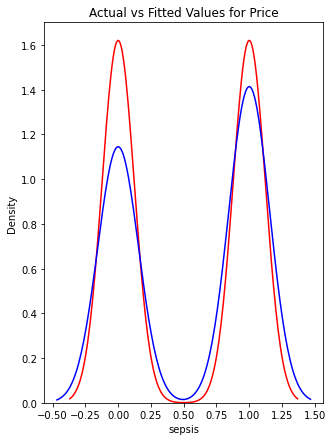

In [46]:
import seaborn as sns
plt.figure(figsize=(5, 7))


ax = sns.distplot(over_y, hist=False, color="r", label="Actual Value")
sns.distplot(y_pred_rfc, hist=False, color="b", label="Fitted Values" , ax=ax)


plt.title('Actual vs Fitted Values for Price')


plt.show()
plt.close()

In [47]:
from sklearn.metrics import precision_recall_fscore_support
print(classification_report(over_y_test, y_pred_rfc))


              precision    recall  f1-score   support

           0       0.72      0.64      0.68       167
           1       0.67      0.75      0.71       166

    accuracy                           0.69       333
   macro avg       0.70      0.69      0.69       333
weighted avg       0.70      0.69      0.69       333



In [48]:
confusion_matrix(over_y_test, y_pred_rfc)

array([[107,  60],
       [ 42, 124]], dtype=int64)

In [49]:
SMOTE_SRF.feature_importances_

array([0.0381284 , 0.02106354, 0.01520218, 0.01899693, 0.01990546,
       0.02871096, 0.85799251])

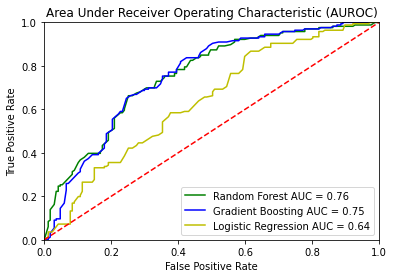

In [52]:
probs_boost = y_pred_boost
fpr_boost, tpr_boost, threshold = metrics.roc_curve(over_y_test, y_pred_proba_boost)
roc_auc_boost = metrics.auc(fpr_boost, tpr_boost)

fpr_logreg, tpr_logreg, threshold = metrics.roc_curve(over_y_test, y_pred_proba_logreg)
roc_auc_logreg = metrics.auc(fpr_logreg, tpr_logreg)

fpr_rfc, tpr_rfc, threshold = metrics.roc_curve(over_y_test, y_pred_proba_rfc)
roc_auc_rfc = metrics.auc(fpr_rfc, tpr_rfc)

plt.title('Area Under Receiver Operating Characteristic (AUROC)')

plt.plot(fpr_rfc, tpr_rfc, 'g', label = 'Random Forest AUC = %0.2f' % roc_auc_rfc)
plt.plot(fpr_boost, tpr_boost, 'b', label = 'Gradient Boosting AUC = %0.2f' % roc_auc_boost)
plt.plot(fpr_logreg, tpr_logreg, 'y', label = 'Logistic Regression AUC = %0.2f' % roc_auc_logreg)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


In [73]:
n_bootstraps = 1000
rng_seed = 42  # control reproducibility
bootstrapped_scores = []

rng = np.random.RandomState(rng_seed)
for i in range(n_bootstraps):
    # bootstrap by sampling with replacement on the prediction indices
    indices = rng.randint(0, len(y_pred_rfc), len(y_pred_rfc))
    if len(np.unique(over_y[indices])) < 2:
        # We need at least one positive and one negative sample for ROC AUC
        # to be defined: reject the sample
        continue

    score = roc_auc_score(over_y[indices], y_pred_rfc[indices])
    bootstrapped_scores.append(score)
    print("Bootstrap #{} ROC area: {:0.3f}".format(i + 1, score))

Bootstrap #1 ROC area: 0.520
Bootstrap #2 ROC area: 0.563
Bootstrap #3 ROC area: 0.528
Bootstrap #4 ROC area: 0.478
Bootstrap #5 ROC area: 0.519
Bootstrap #6 ROC area: 0.490
Bootstrap #7 ROC area: 0.428
Bootstrap #8 ROC area: 0.536
Bootstrap #9 ROC area: 0.453
Bootstrap #10 ROC area: 0.533
Bootstrap #11 ROC area: 0.517
Bootstrap #12 ROC area: 0.455
Bootstrap #13 ROC area: 0.565
Bootstrap #14 ROC area: 0.454
Bootstrap #15 ROC area: 0.492
Bootstrap #16 ROC area: 0.428
Bootstrap #17 ROC area: 0.473
Bootstrap #18 ROC area: 0.556
Bootstrap #19 ROC area: 0.492
Bootstrap #20 ROC area: 0.503
Bootstrap #21 ROC area: 0.488
Bootstrap #22 ROC area: 0.506
Bootstrap #23 ROC area: 0.512
Bootstrap #24 ROC area: 0.406
Bootstrap #25 ROC area: 0.492
Bootstrap #26 ROC area: 0.464
Bootstrap #27 ROC area: 0.484
Bootstrap #28 ROC area: 0.501
Bootstrap #29 ROC area: 0.500
Bootstrap #30 ROC area: 0.510
Bootstrap #31 ROC area: 0.548
Bootstrap #32 ROC area: 0.524
Bootstrap #33 ROC area: 0.422
Bootstrap #34 ROC a

Bootstrap #308 ROC area: 0.487
Bootstrap #309 ROC area: 0.528
Bootstrap #310 ROC area: 0.465
Bootstrap #311 ROC area: 0.512
Bootstrap #312 ROC area: 0.555
Bootstrap #313 ROC area: 0.522
Bootstrap #314 ROC area: 0.499
Bootstrap #315 ROC area: 0.526
Bootstrap #316 ROC area: 0.503
Bootstrap #317 ROC area: 0.512
Bootstrap #318 ROC area: 0.439
Bootstrap #319 ROC area: 0.544
Bootstrap #320 ROC area: 0.546
Bootstrap #321 ROC area: 0.475
Bootstrap #322 ROC area: 0.492
Bootstrap #323 ROC area: 0.562
Bootstrap #324 ROC area: 0.520
Bootstrap #325 ROC area: 0.509
Bootstrap #326 ROC area: 0.480
Bootstrap #327 ROC area: 0.559
Bootstrap #328 ROC area: 0.494
Bootstrap #329 ROC area: 0.539
Bootstrap #330 ROC area: 0.432
Bootstrap #331 ROC area: 0.486
Bootstrap #332 ROC area: 0.486
Bootstrap #333 ROC area: 0.506
Bootstrap #334 ROC area: 0.449
Bootstrap #335 ROC area: 0.529
Bootstrap #336 ROC area: 0.509
Bootstrap #337 ROC area: 0.498
Bootstrap #338 ROC area: 0.525
Bootstrap #339 ROC area: 0.554
Bootstra

Bootstrap #613 ROC area: 0.439
Bootstrap #614 ROC area: 0.446
Bootstrap #615 ROC area: 0.433
Bootstrap #616 ROC area: 0.513
Bootstrap #617 ROC area: 0.517
Bootstrap #618 ROC area: 0.392
Bootstrap #619 ROC area: 0.469
Bootstrap #620 ROC area: 0.565
Bootstrap #621 ROC area: 0.441
Bootstrap #622 ROC area: 0.490
Bootstrap #623 ROC area: 0.466
Bootstrap #624 ROC area: 0.518
Bootstrap #625 ROC area: 0.458
Bootstrap #626 ROC area: 0.475
Bootstrap #627 ROC area: 0.543
Bootstrap #628 ROC area: 0.525
Bootstrap #629 ROC area: 0.503
Bootstrap #630 ROC area: 0.520
Bootstrap #631 ROC area: 0.531
Bootstrap #632 ROC area: 0.578
Bootstrap #633 ROC area: 0.478
Bootstrap #634 ROC area: 0.456
Bootstrap #635 ROC area: 0.504
Bootstrap #636 ROC area: 0.570
Bootstrap #637 ROC area: 0.485
Bootstrap #638 ROC area: 0.519
Bootstrap #639 ROC area: 0.496
Bootstrap #640 ROC area: 0.520
Bootstrap #641 ROC area: 0.411
Bootstrap #642 ROC area: 0.466
Bootstrap #643 ROC area: 0.547
Bootstrap #644 ROC area: 0.543
Bootstra

Bootstrap #907 ROC area: 0.519
Bootstrap #908 ROC area: 0.506
Bootstrap #909 ROC area: 0.548
Bootstrap #910 ROC area: 0.442
Bootstrap #911 ROC area: 0.505
Bootstrap #912 ROC area: 0.477
Bootstrap #913 ROC area: 0.562
Bootstrap #914 ROC area: 0.561
Bootstrap #915 ROC area: 0.518
Bootstrap #916 ROC area: 0.526
Bootstrap #917 ROC area: 0.523
Bootstrap #918 ROC area: 0.514
Bootstrap #919 ROC area: 0.487
Bootstrap #920 ROC area: 0.456
Bootstrap #921 ROC area: 0.474
Bootstrap #922 ROC area: 0.417
Bootstrap #923 ROC area: 0.470
Bootstrap #924 ROC area: 0.465
Bootstrap #925 ROC area: 0.530
Bootstrap #926 ROC area: 0.496
Bootstrap #927 ROC area: 0.525
Bootstrap #928 ROC area: 0.458
Bootstrap #929 ROC area: 0.490
Bootstrap #930 ROC area: 0.553
Bootstrap #931 ROC area: 0.491
Bootstrap #932 ROC area: 0.565
Bootstrap #933 ROC area: 0.452
Bootstrap #934 ROC area: 0.582
Bootstrap #935 ROC area: 0.455
Bootstrap #936 ROC area: 0.464
Bootstrap #937 ROC area: 0.556
Bootstrap #938 ROC area: 0.513
Bootstra

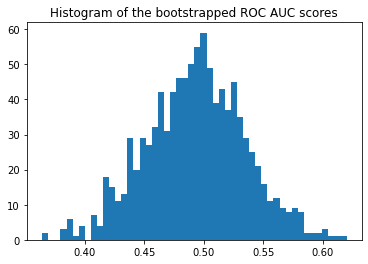

In [70]:
import matplotlib.pyplot as plt
plt.hist(bootstrapped_scores, bins=50)
plt.title('Histogram of the bootstrapped ROC AUC scores')
plt.show()

In [81]:
len(over_y)

1110

In [86]:
len(y_pred_proba_rfc)

333

In [83]:
(over_y_test)

158     1
867     1
1041    1
413     1
500     0
       ..
769     1
887     1
936     1
43      0
583     0
Name: sepsis, Length: 333, dtype: int64

In [57]:
import numpy as np
np.random.seed(1234)
rng=np.random.RandomState(1234)

def get_ci_auc( y_true, y_pred ): 

    from scipy.stats import sem
    from sklearn.metrics import roc_auc_score 
   
    n_bootstraps = 1000   
    bootstrapped_scores = []  
    
   # for k in range(len(y_pred)):
        
   
    for i in range(n_bootstraps):
        # bootstrap by sampling with replacement on the prediction indices
        indices = rng.randint(0, len(y_pred) - 1, len(y_pred))
       
        if len(np.unique(y_true[indices])) < 2:
            # We need at least one positive and one negative sample for ROC AUC
            # to be defined: reject the sample
            continue

        score = roc_auc_score(y_true[indices], y_pred[indices])
        bootstrapped_scores.append(score)   
 
    sorted_scores = np.array(bootstrapped_scores)
    sorted_scores.sort()

   # 90% c.i.
   # confidence_lower = sorted_scores[int(0.05 * len(sorted_scores))]
   # confidence_upper = sorted_scores[int(0.95 * len(sorted_scores))]
 
   # 95% c.i.
    confidence_lower = sorted_scores[int(0.025 * len(sorted_scores))]
    confidence_upper = sorted_scores[int(0.975 * len(sorted_scores))]
   
    return confidence_lower,confidence_upper

In [87]:
get_ci_auc(over_y_test,y_pred_proba_rfc)

KeyError: '[93, 10, 290, 1, 321, 307, 40, 171, 328, 154, 57, 235, 106, 253, 207, 302, 63, 237, 163, 172, 150, 125, 259, 0, 122, 254, 312, 268, 190, 320, 59, 85, 261, 236, 239, 69, 230, 137, 178, 264, 140, 317, 86, 108, 27, 327, 118, 225, 80, 98, 309, 102, 82, 240, 305, 243, 170, 188, 189, 257, 319, 131, 165, 29, 42, 111, 37, 61, 318, 194, 222, 72, 232, 223, 97, 12, 18, 149, 323, 265, 316, 283, 300, 144, 233, 56, 100, 227, 79, 192, 101, 329, 208, 152, 285, 25, 270, 177, 266, 33, 214, 251, 224, 5, 234, 263, 182, 17, 45, 174, 4, 271, 247, 90, 128, 255, 298, 142, 76, 138, 279, 301, 24, 16, 181, 104, 129, 212, 55, 250, 147, 105, 294, 246, 308, 153, 157, 91, 22, 276, 215, 167, 284, 15, 322, 49, 175, 114, 314, 75] not in index'

In [28]:
loss_boost = brier_score_loss(over_y_test, y_pred_boost)
loos_logreg = brier_score_loss(over_y_test, y_pred_logreg)
rf_logreg = brier_score_loss(over_y_test, y_pred_rfc)


print("rf :", rf_logreg)
print("boost :", loss_boost)
print("logreg :", loos_logreg)

rf : 0.3183183183183183
boost : 0.35135135135135137
logreg : 0.42042042042042044


In [26]:
from sklearn.metrics import roc_auc_score
from math import sqrt

def roc_auc_ci(y_true, y_score, positive=1):
    AUC = roc_auc_score(y_true, y_score)
    N1 = sum(y_true == positive)
    N2 = sum(y_true != positive)
    Q1 = AUC / (2 - AUC)
    Q2 = 2*AUC**2 / (1 + AUC)
    SE_AUC = sqrt((AUC*(1 - AUC) + (N1 - 1)*(Q1 - AUC**2) + (N2 - 1)*(Q2 - AUC**2)) / (N1*N2))
    lower = AUC - 1.96*SE_AUC
    upper = AUC + 1.96*SE_AUC
    if lower < 0:
        lower = 0
    if upper > 1:
        upper = 1
    return (lower, upper)

In [62]:
roc_auc_ci(over_y,roc_auc_rfc)

TypeError: Singleton array array(0.75883775) cannot be considered a valid collection.